In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import simweights
import pickle
import os, sys
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import pandas as pd
import tables
import h5py
import math
from scipy.stats import mstats
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from fonts import *



In [3]:
sys.path.append("/data/user/tvaneede/GlobalFit/EventGenerator/performance")
from weights import *
from utils import *
from files import files
from selections import create_selections

In [4]:
# version and plotting path
version = "v0"
files = files[version]


In [5]:
main_plotting_path = f"/data/user/tvaneede/GlobalFit/EventGenerator/performance/output/{version}"
os.system(f"mkdir -p {main_plotting_path}")

0

In [6]:
# open the files
for flavor in files:
    files[flavor]['hdf_file'] = pd.HDFStore(files[flavor]['file_path'],'r')
    files[flavor]['variables'] = get_variables( files[flavor]['hdf_file'] )
    files[flavor] = Append_Weights( files[flavor] )


In [7]:
keys_to_merge = {
    "NuE" : ["NuE_E2", "NuE_E3"],
    "NuMu" : ["NuMu_E2", "NuMu_E3"],
    "NuTau" : ["NuTau_E2", "NuTau_E3"],
    "NuAll" : ['NuE', "NuMu", "NuTau"],
}

for new_key in keys_to_merge:
    files[new_key] = {}
    files[new_key]['variables'] = {}

    for key in keys_to_merge[new_key]:
        for variable in files[key]['variables']:
            if variable not in files[new_key]['variables']:
                files[new_key]['variables'][variable] = []
            files[new_key]['variables'][variable].append( pd.Series(files[key]['variables'][variable]) )
    
    for variable in files[new_key]['variables']:
        files[new_key]['variables'][variable] = pd.concat(files[new_key]['variables'][variable])


In [11]:
from selections import create_selections

In [12]:
selections = create_selections( files["NuAll"] )

In [13]:
from fonts import *

RecoETot>60TeV


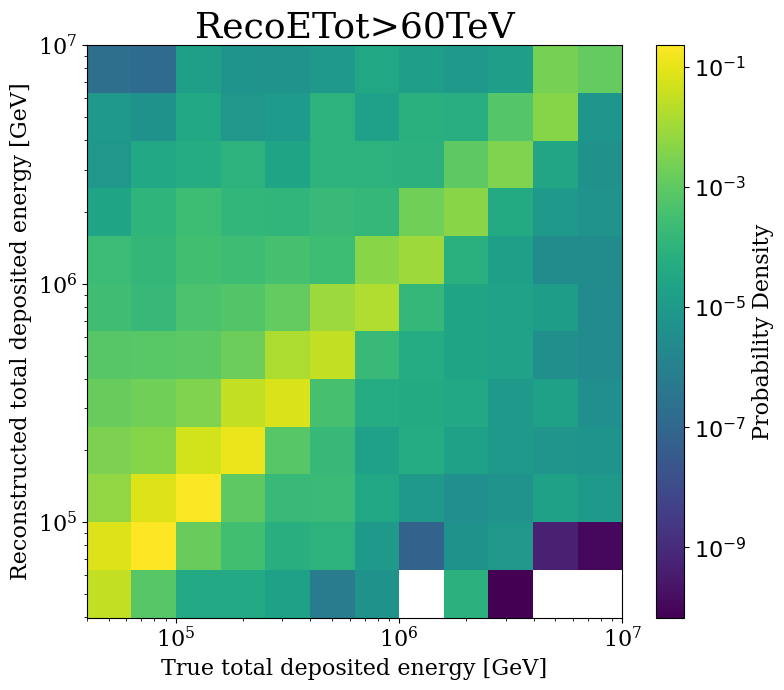

In [45]:
# RecoETot-TrueETot
plotting_path = f"{main_plotting_path}/RecoETot-TrueETot"
os.system(f"mkdir -p {plotting_path}")

for selection_name,selection in selections.items():

    print(selection_name)

    fig, ax = plt.subplots(1, 1,figsize =(8,7))

    x = files['NuAll']['variables']['TrueETot'][ selection ]
    y = files['NuAll']['variables']['RecoETot'][ selection ]
    w = files['NuAll']['variables']['Weights_Astro'][selection]

    clb = plot_2dHist(x=x,y=y,weights=w,
                xbins_start=4.6,xbins_stop=7,xbins=13,
                ybins_start=4.6,ybins_stop=7,ybins=13,
                xlogspace=True,ylogspace=True,\
                title=selection_name,eventcount=False,ax=ax)

    ax.set_xlabel("True total deposited energy [GeV]",fontdict=font_axis_label)
    ax.set_ylabel("Reconstructed total deposited energy [GeV]",fontdict=font_axis_label)
    clb.set_label('Probability Density', fontdict=font_axis_label)

    plt.tight_layout()
    # plt.savefig(f"{plotting_path}/RecoETot-TrueETot_selection-{selection_name}.pdf")
    break
    

RecoETot>60TeV


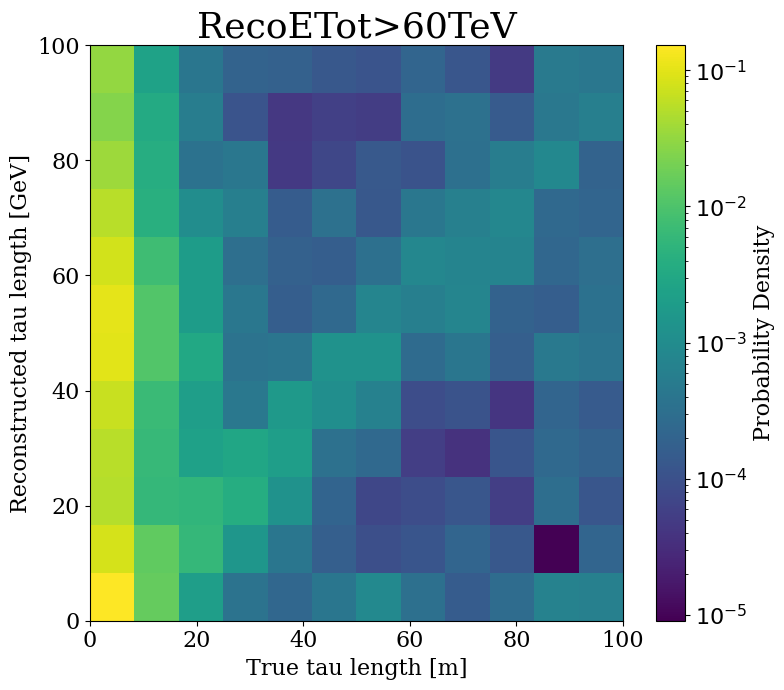

In [15]:
# RecoL-TrueL

for length_variable in ["RecoL", "RecoL_evtgen"]:

    plotting_path = f"{main_plotting_path}/{length_variable}-TrueL"
    os.system(f"mkdir -p {plotting_path}")

    for selection_name,selection in selections.items():

        print(selection_name)

        fig, ax = plt.subplots(1, 1,figsize =(8,7))

        x = files['NuAll']['variables']['TrueL'][ selection ]
        y = files['NuAll']['variables'][length_variable][ selection ]
        w = files['NuAll']['variables']['Weights_Astro'][selection]

        clb = plot_2dHist(x=x,y=y,weights=w,
                    xbins_start=0,xbins_stop=100,xbins=13,
                    ybins_start=0,ybins_stop=100,ybins=13,
                    xlogspace=False,ylogspace=False,\
                    title= selection_name,eventcount=False,ax=ax)

        ax.set_xlabel("True tau length [m]",fontdict=font_axis_label)
        ax.set_ylabel("Reconstructed tau length [GeV]",fontdict=font_axis_label)
        clb.set_label('Probability Density', fontdict=font_axis_label)

        plt.tight_layout()
        plt.savefig(f"{plotting_path}/{length_variable}-TrueL_selection-{selection_name}.pdf")
        break
    break


RecoETot>60TeV


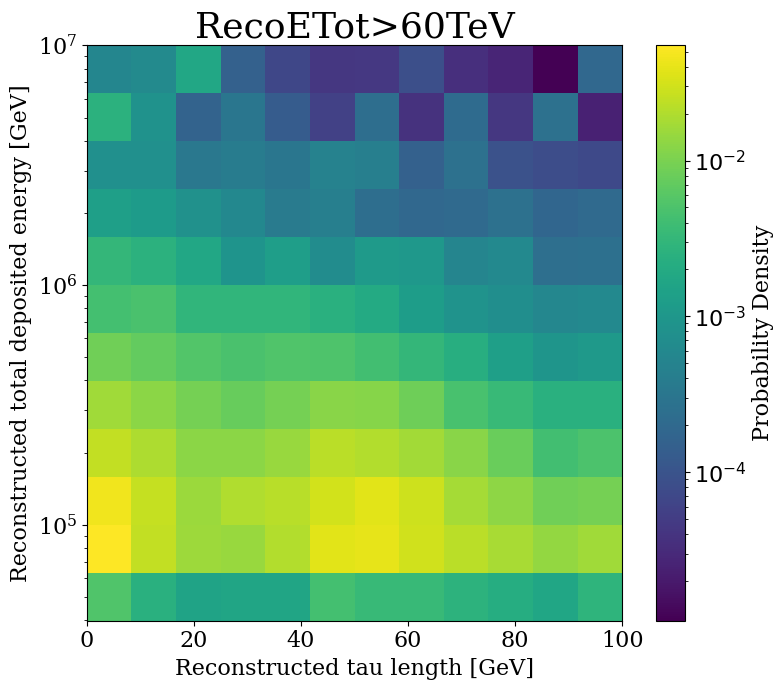

In [17]:
# RecoETot-RecoL

for length_variable in ["RecoL", "RecoL_evtgen"]:

    plotting_path = f"{main_plotting_path}/RecoETot-{length_variable}"
    os.system(f"mkdir -p {plotting_path}")

    for selection_name,selection in selections.items():

        print(selection_name)

        fig, ax = plt.subplots(1, 1,figsize =(8,7))

        x = files['NuAll']['variables'][length_variable][ selection ]
        y = files['NuAll']['variables']['RecoETot'][ selection ]
        w = files['NuAll']['variables']['Weights_Astro'][selection]

        clb = plot_2dHist(x=x,y=y,weights=w,
                    xbins_start=0,xbins_stop=100,xbins=13,
                    ybins_start=4.6,ybins_stop=7,ybins=13,
                    xlogspace=False,ylogspace=True,\
                    title= selection_name,eventcount=False,ax=ax)

        ax.set_ylabel("Reconstructed total deposited energy [GeV]",fontdict=font_axis_label)
        ax.set_xlabel("Reconstructed tau length [GeV]",fontdict=font_axis_label)
        clb.set_label('Probability Density', fontdict=font_axis_label)

        plt.tight_layout()

        plt.savefig(f"{plotting_path}/RecoETot-{length_variable}_selection-{selection_name}.pdf")

        break

    break

In [18]:
from plot_utils import *

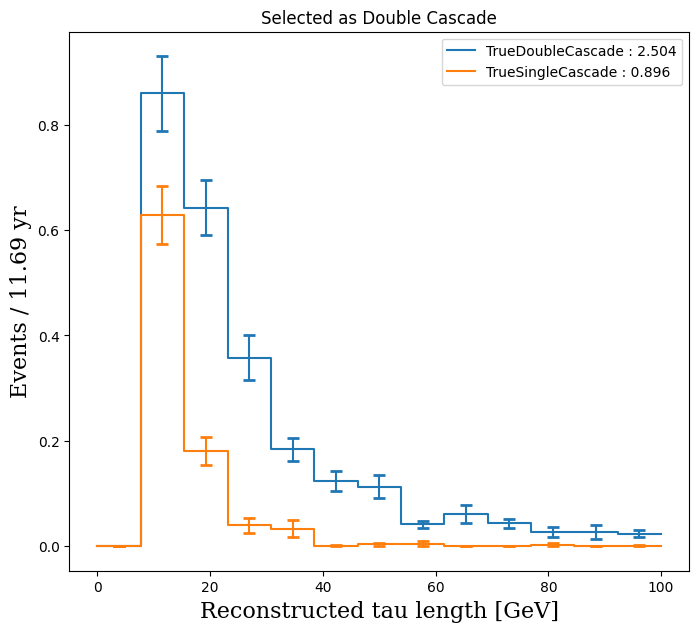

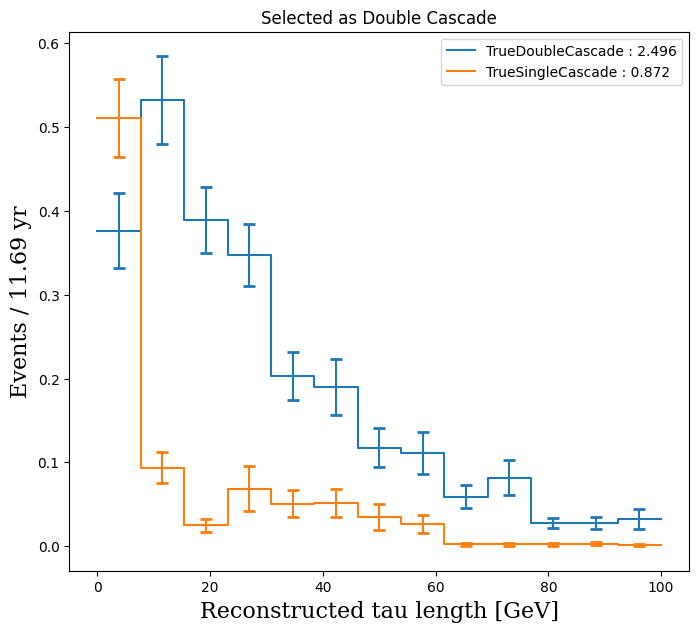

In [60]:
bins = np.linspace(0,100,14)
livetime_yr = 11.687
livetime_s  = livetime_yr * 365.25 * 24 * 3600 # 11.687 year

for variable in ["RecoL", "RecoL_evtgen"]:

    plotting_path = f"{main_plotting_path}/{variable}"
    os.system(f"mkdir -p {plotting_path}")

    fig, ax = plt.subplots(1, 1,figsize =(8,7))

    for selection_name in ["DoubleCascade_TrueDoubleCascade", "DoubleCascade_TrueSingleCascade"]:
        
        selection = selections[selection_name]
        selection_name = selection_name.split("_")[1]

        y = np.abs(files['NuAll']['variables'][variable][ selection ])
        w = files['NuAll']['variables']['Weights_Astro'][selection]

        hist,hist_err = make_hist_error(samples=y, bins=bins,weights=w*368813893.34)

        label = f"{selection_name} : {sum(hist):.3f}"

        plot_hist_errorbar(ax=ax,hist=hist,bins=bins,yerror=hist_err,label=label)

    ax.legend()
    ax.set_ylabel(f"Events / {livetime_yr:.2f} yr",fontdict=font_axis_label)
    ax.set_xlabel("Reconstructed tau length [GeV]",fontdict=font_axis_label)
    ax.set_title("Selected as Double Cascade")
    plt.savefig(f"{plotting_path}/{variable}_selection-NehaHESE.pdf")


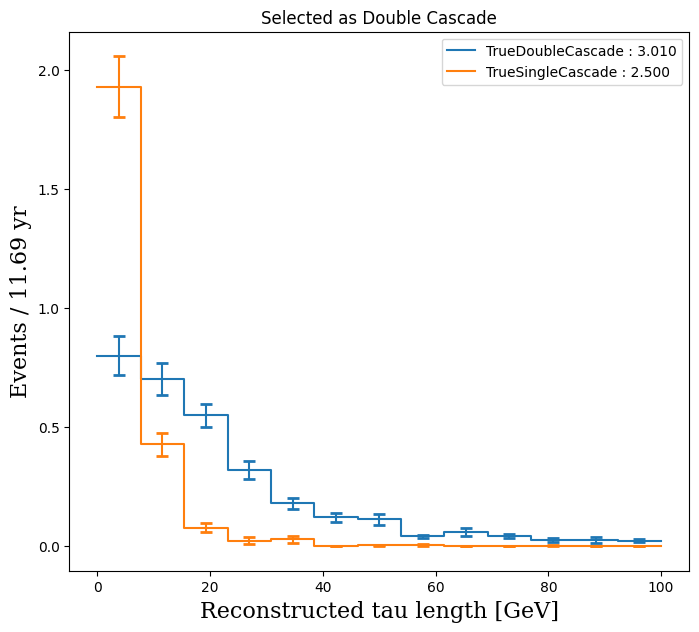

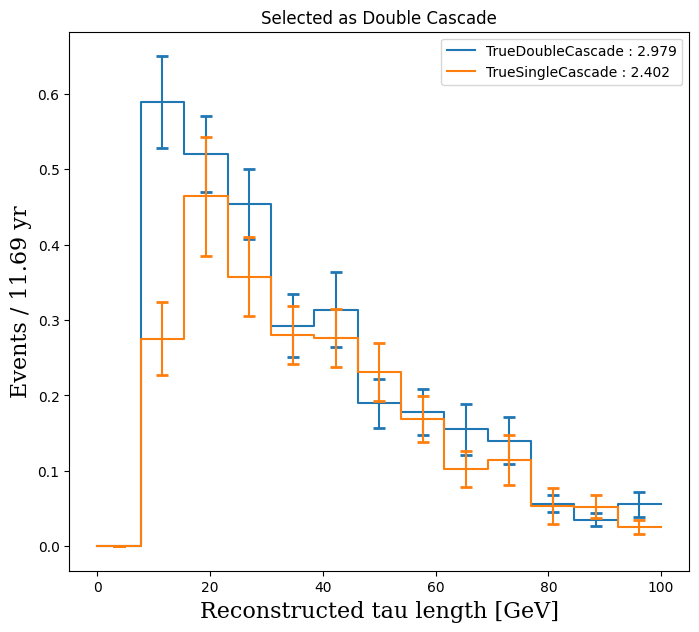

In [ ]:
bins = np.linspace(0,100,14)
livetime_yr = 11.687
livetime_s  = livetime_yr * 365.25 * 24 * 3600 # 11.687 year

for variable in ["RecoL", "RecoL_evtgen"]:

    plotting_path = f"{main_plotting_path}/{variable}"
    os.system(f"mkdir -p {plotting_path}")

    fig, ax = plt.subplots(1, 1,figsize =(8,7))

    for selection_name in ["DoubleCascadeEvtGen_TrueDoubleCascade", "DoubleCascadeEvtGen_TrueSingleCascade"]:
        
        selection = selections[selection_name]
        selection_name = selection_name.split("_")[1]

        y = np.abs(files['NuAll']['variables'][variable][ selection ])
        w = files['NuAll']['variables']['Weights_Astro'][selection]

        hist,hist_err = make_hist_error(samples=y, bins=bins,weights=w*368813893.34)

        label = f"{selection_name} : {sum(hist):.3f}"

        plot_hist_errorbar(ax=ax,hist=hist,bins=bins,yerror=hist_err,label=label)

    ax.legend()
    ax.set_ylabel(f"Events / {livetime_yr:.2f} yr",fontdict=font_axis_label)
    ax.set_xlabel("Reconstructed tau length [GeV]",fontdict=font_axis_label)
    ax.set_title("Selected as Double Cascade")
    plt.savefig(f"{plotting_path}/{variable}_selection-EvtGen.pdf")


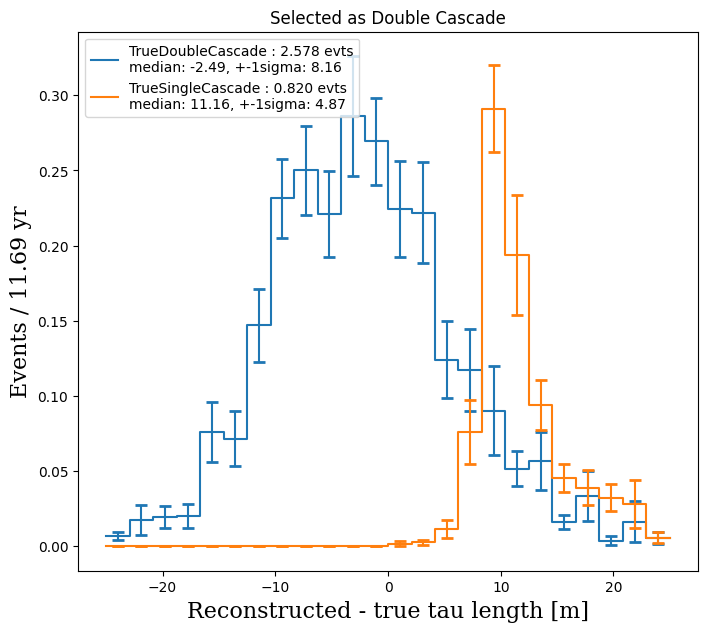

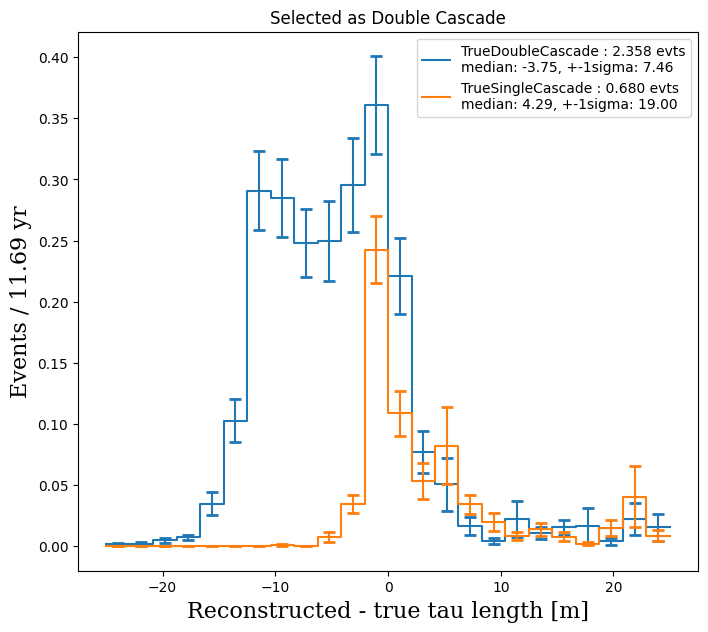

In [26]:
# length resolution
bins = np.linspace(-25,25,25)
livetime_yr = 11.687
livetime_s  = livetime_yr * 365.25 * 24 * 3600 # 11.687 year


    # plotting_path = f"{main_plotting_path}/{variable}"
    # os.system(f"mkdir -p {plotting_path}")

for variable in ["RecoL", "RecoL_evtgen"]:

    fig, ax = plt.subplots(1, 1,figsize =(8,7))

    for selection_name in ["DoubleCascade_TrueDoubleCascade", "DoubleCascade_TrueSingleCascade"]:
        
        selection = selections[selection_name]
        selection_name = selection_name.split("_")[1]

        y = np.abs(files['NuAll']['variables'][variable][ selection ]) - files['NuAll']['variables']['TrueL'][ selection ]
        w = files['NuAll']['variables']['Weights_Astro'][selection]

        hist,hist_err = make_hist_error(samples=y, bins=bins,weights=w*368813893.34)

        quantiles = weighted_quantile( values=y, quantiles=[0.16,0.5,0.84], sample_weight=w)

        label = f"{selection_name} : {sum(hist):.3f} evts\nmedian: {quantiles[1]:.2f}, +-1sigma: {(quantiles[2]-quantiles[0])/2:.2f}"

        plot_hist_errorbar(ax=ax,hist=hist,bins=bins,yerror=hist_err,label=label)

    ax.legend()
    ax.set_ylabel(f"Events / {livetime_yr:.2f} yr",fontdict=font_axis_label)
    ax.set_xlabel("Reconstructed - true tau length [m]",fontdict=font_axis_label)
    ax.set_title("Selected as Double Cascade")
    # plt.savefig(f"{plotting_path}/{variable}_selection-EvtGen.pdf")
